<a href="https://colab.research.google.com/github/sahilfaizal01/Multi-Disease-Prediction-App/blob/main/Heart_Disease_Prediction_Using_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **DATA COLLECTION AND ANALYSIS**

In [2]:
df = pd.read_csv('/content/heart_disease_data.csv') 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## 0 -> Healthy
## 1 -> Defective

In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


## It can be noted that the average age and cholestrol level of of a defective person is less in comparison

In [10]:
X = df.drop(columns = ['target'],axis=1)
y = df['target']

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [13]:
X.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.0,-0.09845,-0.06865,0.2794,0.2137,0.1213,-0.1162,-0.3985,0.0968,0.21,-0.1688,0.2763,0.068
sex,-0.09845,1.0,-0.04935,-0.05677,-0.1979,0.04503,-0.0582,-0.04402,0.1417,0.09609,-0.03071,0.1183,0.21
cp,-0.06865,-0.04935,1.0,0.04761,-0.0769,0.09444,0.04442,0.2958,-0.3943,-0.1492,0.1197,-0.1811,-0.1617
trestbps,0.2794,-0.05677,0.04761,1.0,0.1232,0.1775,-0.1141,-0.0467,0.06762,0.1932,-0.1215,0.1014,0.06221
chol,0.2137,-0.1979,-0.0769,0.1232,1.0,0.01329,-0.151,-0.00994,0.06702,0.05395,-0.004038,0.07051,0.0988
fbs,0.1213,0.04503,0.09444,0.1775,0.01329,1.0,-0.08419,-0.008567,0.02567,0.005747,-0.05989,0.138,-0.03202
restecg,-0.1162,-0.0582,0.04442,-0.1141,-0.151,-0.08419,1.0,0.04412,-0.07073,-0.05877,0.09304,-0.07204,-0.01198
thalach,-0.3985,-0.04402,0.2958,-0.0467,-0.00994,-0.008567,0.04412,1.0,-0.3788,-0.3442,0.3868,-0.2132,-0.09644
exang,0.0968,0.1417,-0.3943,0.06762,0.06702,0.02567,-0.07073,-0.3788,1.0,0.2882,-0.2577,0.1157,0.2068
oldpeak,0.21,0.09609,-0.1492,0.1932,0.05395,0.005747,-0.05877,-0.3442,0.2882,1.0,-0.5775,0.2227,0.2102


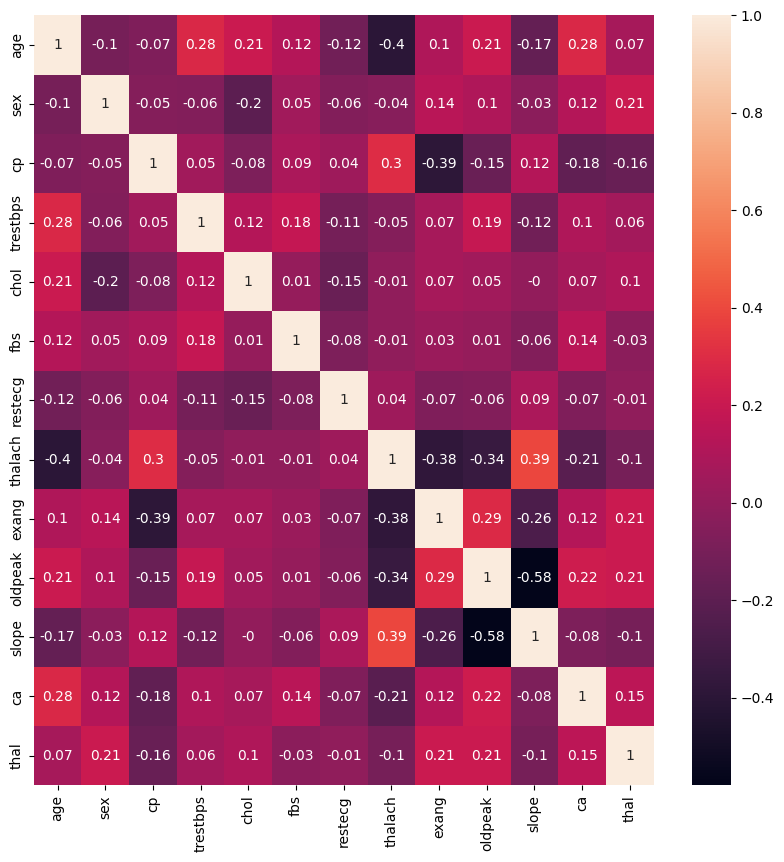

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
matrix = X.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

# SCALING

In [15]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [16]:
X = standardized_data

# SPLITTING THE DATASET

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# TRAIN THE CLASSIFIER

## **SVM**

In [19]:
classifier = svm.SVC(kernel='linear')

In [20]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## **LOGISTIC REGRESSION**

In [21]:
reg = LogisticRegression()
reg.fit(X_train, Y_train)

LogisticRegression()

## **RANDOM FOREST**

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

## **XGBOOST**

In [23]:
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## **DECISION TREES**

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

# MODEL EVALUATION

## **SVM**

In [25]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.859504132231405


In [27]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.819672131147541


In [29]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.88      0.81      0.84        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



## **LOGISTIC REGRESSION**

In [30]:
lr_train_pred = reg.predict(X_train)
lr_train_acc = accuracy_score(lr_train_pred, Y_train)
print('Accuracy score of the training data : ', lr_train_acc)
lr_test_pred = reg.predict(X_test)
lr_test_acc = accuracy_score(lr_test_pred, Y_test)
print('Accuracy score of the training data : ', lr_test_acc)

Accuracy score of the training data :  0.8471074380165289
Accuracy score of the training data :  0.7868852459016393


In [31]:
print(classification_report(lr_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        29
           1       0.79      0.81      0.80        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



## **RANDOM FOREST**

In [32]:
rf_train_pred = rf.predict(X_train)
rf_train_acc = accuracy_score(rf_train_pred, Y_train)
print('Accuracy score of the training data : ', rf_train_acc)
rf_test_pred = rf.predict(X_test)
rf_test_acc = accuracy_score(rf_test_pred, Y_test)
print('Accuracy score of the training data : ', rf_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.8032786885245902


In [33]:
print(classification_report(rf_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## **XGBOOST**

In [35]:
xgb_train_pred = xgb.predict(X_train)
xgb_train_acc = accuracy_score(xgb_train_pred, Y_train)
print('Accuracy score of the training data : ', xgb_train_acc)
xgb_test_pred = xgb.predict(X_test)
xgb_test_acc = accuracy_score(xgb_test_pred, Y_test)
print('Accuracy score of the training data : ', xgb_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.7704918032786885


In [36]:
print(classification_report(xgb_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## **DECISION TREES**

In [37]:
dt_train_pred = dt.predict(X_train)
dt_train_acc = accuracy_score(dt_train_pred, Y_train)
print('Accuracy score of the training data : ', dt_train_acc)
dt_test_pred = dt.predict(X_test)
dt_test_acc = accuracy_score(dt_test_pred, Y_test)
print('Accuracy score of the training data : ', dt_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the training data :  0.7868852459016393


In [38]:
print(classification_report(dt_test_pred,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



### **The SVM model IS seen as the best classifier with minimal trend of overfitting**

# **DATA-BALANCING USING SMOTE**

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y)
print('Before Upsampling:',counter)
oversample = SMOTE()
Xm, ym = oversample.fit_resample(X, y)
# summarize the new class distribution
counterm = Counter(ym)
print('After Upsampling:',counterm)

Before Upsampling: Counter({1: 165, 0: 138})
After Upsampling: Counter({1: 165, 0: 165})


In [40]:
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm,ym, test_size = 0.20, stratify=ym, random_state=2)

In [41]:
classifier1 = svm.SVC(kernel='linear')
classifier1.fit(Xm_train, Ym_train)
classifier1_train_pred = classifier1.predict(Xm_train)
classifier1_train_acc = accuracy_score(classifier1_train_pred, Ym_train)
print('Accuracy score of the training data : ', classifier1_train_acc)
classifier1_test_pred = classifier1.predict(Xm_test)
classifier1_test_acc = accuracy_score(classifier1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', classifier1_test_acc)

Accuracy score of the training data :  0.8598484848484849
Accuracy score of the testing data :  0.8333333333333334


In [47]:
print(classification_report(classifier1_test_pred,Ym_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.88      0.81      0.84        36

    accuracy                           0.83        66
   macro avg       0.83      0.84      0.83        66
weighted avg       0.84      0.83      0.83        66



<Axes: xlabel='Predicted', ylabel='Actual'>

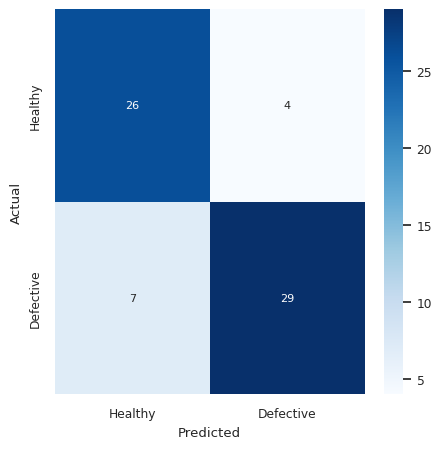

In [45]:
data = confusion_matrix(classifier1_test_pred,Ym_test)
clm = ['Healthy','Defective']
df_cm = pd.DataFrame(data, columns=clm, index = clm)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=0.8)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size

In [46]:
import pickle
filename = 'heart_disease_model.sav'
pickle.dump(classifier1, open(filename, 'wb'))

In [42]:
lr1 = LogisticRegression()
lr1.fit(Xm_train, Ym_train)
lr1_train_pred = lr1.predict(Xm_train)
lr1_train_acc = accuracy_score(lr1_train_pred, Ym_train)
print('Accuracy score of the training data : ', lr1_train_acc)
lr1_test_pred = lr1.predict(Xm_test)
lr1_test_acc = accuracy_score(lr1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', lr1_test_acc)

Accuracy score of the training data :  0.8522727272727273
Accuracy score of the testing data :  0.8333333333333334


In [43]:
rf1 = RandomForestClassifier()
rf1.fit(Xm_train, Ym_train)
rf1_train_pred = rf1.predict(Xm_train)
rf1_train_acc = accuracy_score(rf1_train_pred, Ym_train)
print('Accuracy score of the training data : ', rf1_train_acc)
rf1_test_pred = rf1.predict(Xm_test)
rf1_test_acc = accuracy_score(rf1_test_pred, Ym_test)
print('Accuracy score of the testing data : ', rf1_test_acc)

Accuracy score of the training data :  1.0
Accuracy score of the testing data :  0.8181818181818182


# **MAKING A PREDICTIVE SYSTEM**

In [48]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
